In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df=pd.read_csv("../Data/diabetes.csv")

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

## Voting Classifier

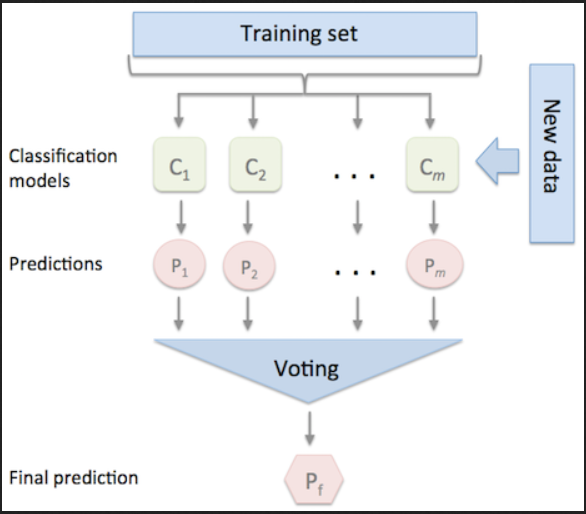

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[('lr',LogisticRegression(class_weight='balanced')),('knn',KNeighborsClassifier(n_neighbors=3)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB()),('rf',RandomForestClassifier(n_estimators=100))]

In [50]:
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting='hard')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.7987012987012987
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



<AxesSubplot:>

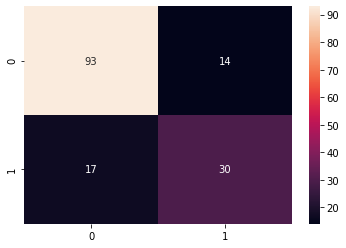

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

## Stacking
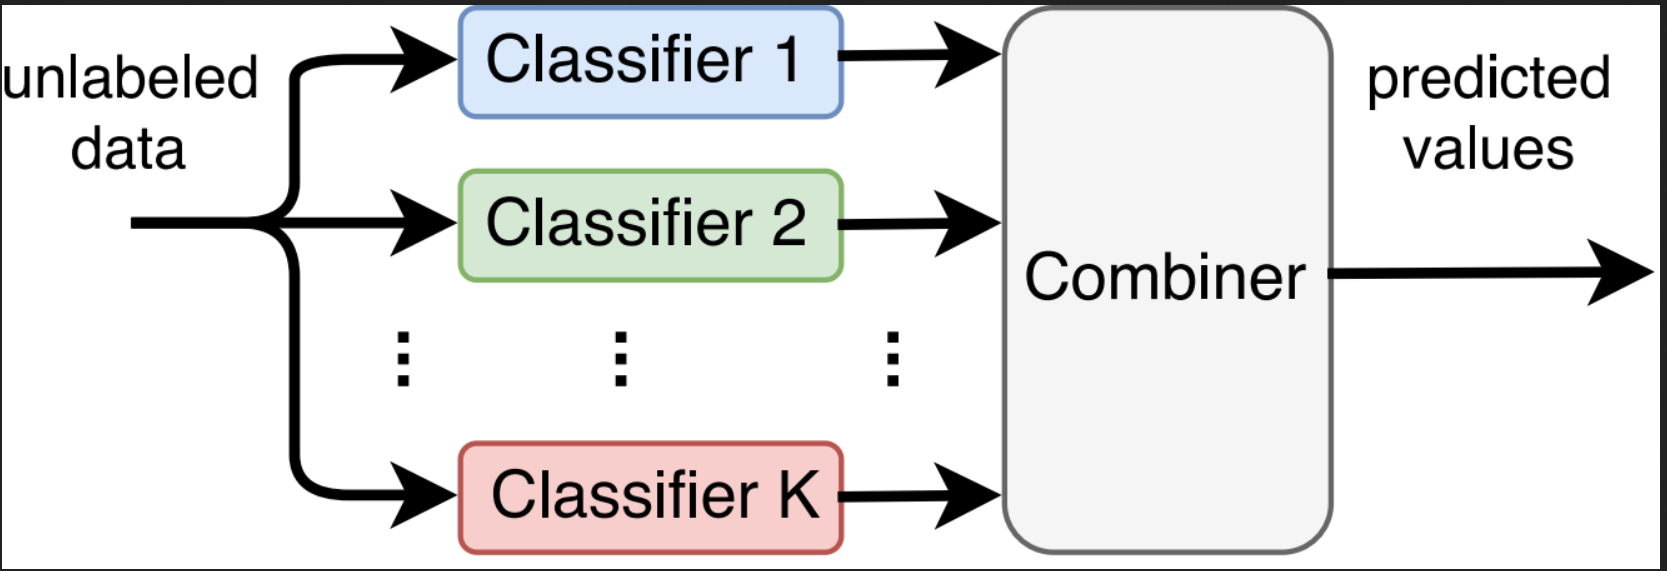

In [65]:
# Stacked classifier
base_models=[('knn',KNeighborsClassifier(n_neighbors=5)),
        ('svm',SVC(probability =True)),('GNB',GaussianNB())
             ,('rf',RandomForestClassifier(n_estimators=100))]
final_model=LogisticRegression()

from sklearn.ensemble import StackingClassifier
model=StackingClassifier(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.8181818181818182
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



<AxesSubplot:>

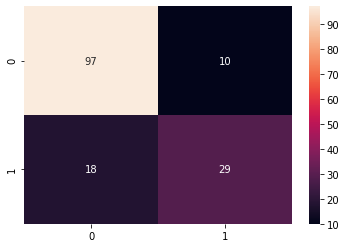

In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [67]:
df=pd.read_csv("../Data/housing.csv")

In [68]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [71]:
x=df.drop(columns=["MEDV"])
y=df["MEDV"]

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [82]:
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
base_models=[("Elasticnet",ElasticNetCV()),('gbr',GradientBoostingRegressor(n_estimators=100)),('svr',SVR())]
final_model=LinearRegression()

In [83]:
from sklearn.ensemble import StackingRegressor
model=StackingRegressor(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [84]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.8073326437124905


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html">Click Here For Sklearn Voting Classifier</a>
<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">Click Here For Sklearn Stacking Classifier</a>